**Import Library**

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Tensorflow import
import tensorflow as tf
# Import library Keras
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Datasets/'

**Data Understanding**

In [ ]:
data = '/content/drive/MyDrive/Datasets/train'

**Mengidentifikasi struktur folder dataset dan memperoleh total kategori (kelas) yang ada.**

In [ ]:
class_names = [class_dir for class_dir in os.listdir(data) if os.path.isdir(os.path.join(data, class_dir))]

class_dis = [len(list(os.listdir(os.path.join(data, class_name)))) for class_name in class_names]
total_classes = len(class_names)

print(f"Jumlah class : {total_classes} \nNama-nama class : {class_names}")

Jumlah class : 15 
Nama-nama class : ['Brokoli', 'Capsicum', 'Kacang_Polong', 'Kembang_Kol', 'Kentang', 'Labu_Botol', 'Kubis', 'Labu_Kabocha_Hijau', 'Labu_Pahit', 'Lobak', 'Pepaya', 'Terong_Hijau', 'Timun', 'Tomat', 'Wortel']


In [ ]:
import os

ukuran_data_kelas = {}

for kelas in class_names:
    kelas_dir = os.path.join(data, kelas)
    total_ukuran_kelas = 0
    jumlah_gambar_kelas = 0

    for filename in os.listdir(kelas_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(kelas_dir, filename)
            file_size = os.path.getsize(image_path)

            total_ukuran_kelas += file_size
            jumlah_gambar_kelas += 1

    ukuran_data_kelas[kelas] = {
        "Jumlah Gambar": jumlah_gambar_kelas,
        "Total Ukuran (MB)": round(total_ukuran_kelas / (1024*1024), 2)
    }

# Cetak hasil
for kelas, stats in ukuran_data_kelas.items():
    print(f"{kelas} -> {stats}")


Brokoli -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 37.23}
Capsicum -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 12.36}
Kacang_Polong -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 29.27}
Kembang_Kol -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 39.93}
Kentang -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 21.31}
Labu_Botol -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 15.37}
Kubis -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 30.07}
Labu_Kabocha_Hijau -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 36.82}
Labu_Pahit -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 21.99}
Lobak -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 23.42}
Pepaya -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 14.94}
Terong_Hijau -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 44.14}
Timun -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 29.83}
Tomat -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 15.97}
Wortel -> {'Jumlah Gambar': 1000, 'Total Ukuran (MB)': 16.78}


**Exploratory Data Analysis (EDA)**

In [ ]:
image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_names:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/drive/MyDrive/Datasets/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})

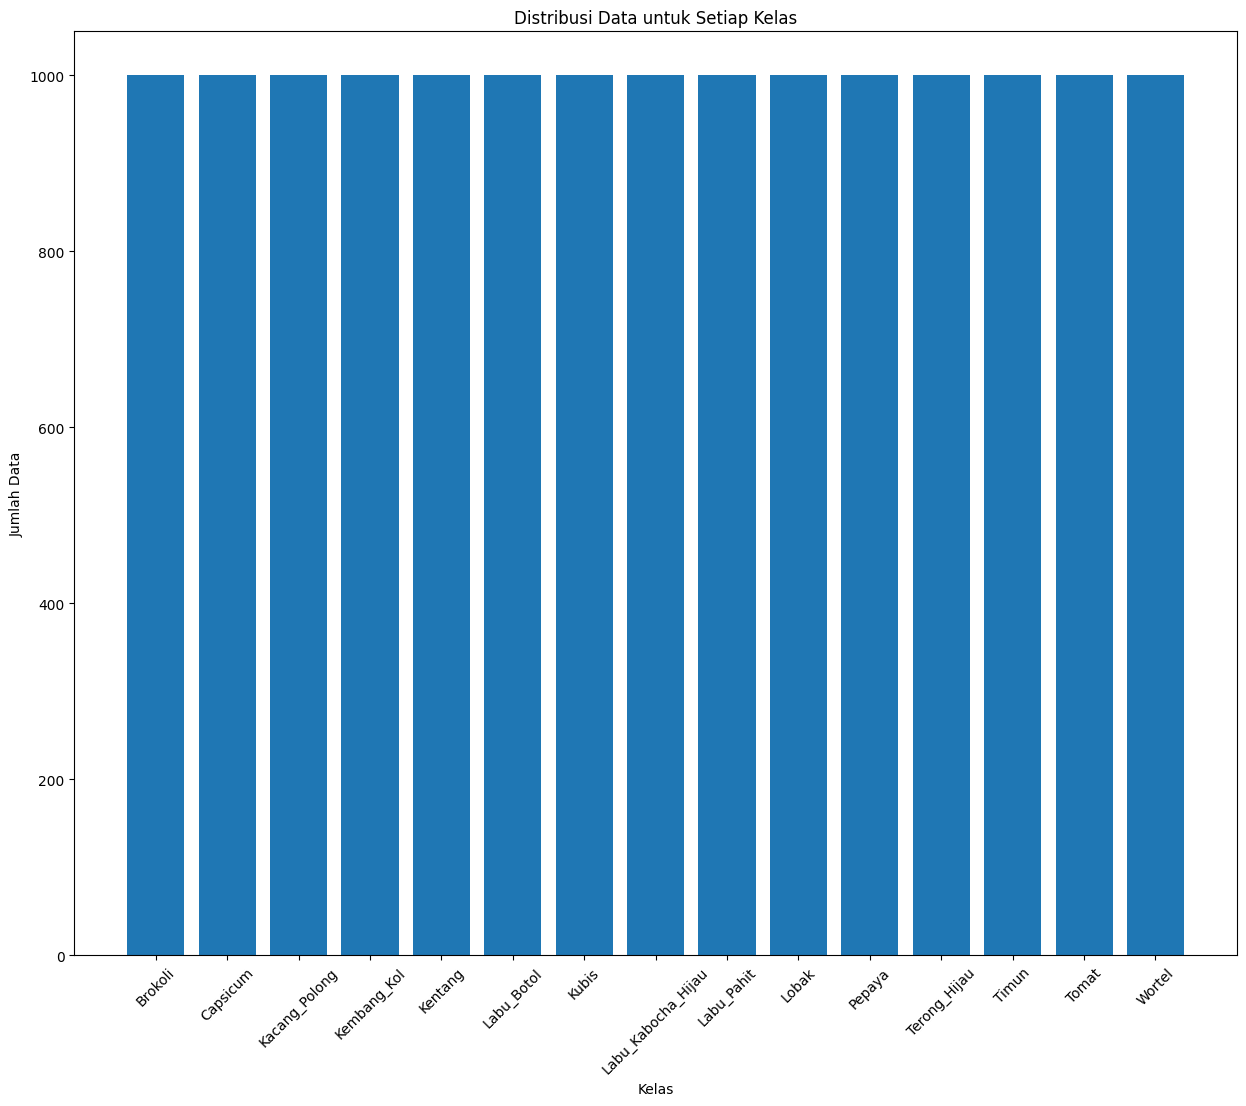

In [ ]:
# Data distribusi data pada setiap kelas
class_names = df_count_train["class"]
class_counts = df_count_train["count"]

# Membuat plot bar untuk distribusi data pada setiap kelas
plt.figure(figsize=(15, 12))
plt.bar(class_names, class_counts)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data untuk Setiap Kelas")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk kelas yang panjang
plt.show()

In [ ]:
# Visualize the class distribution
fig = px.pie(names=class_names, values=class_dis, title="Distribusi Data untuk Setiap Kelas", hole=0.4)
fig.update_layout(title_x=0.5)  # Mengatur posisi judul
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Menampilkan contoh data pelatihan dari masing-masing kelas secara acak.**

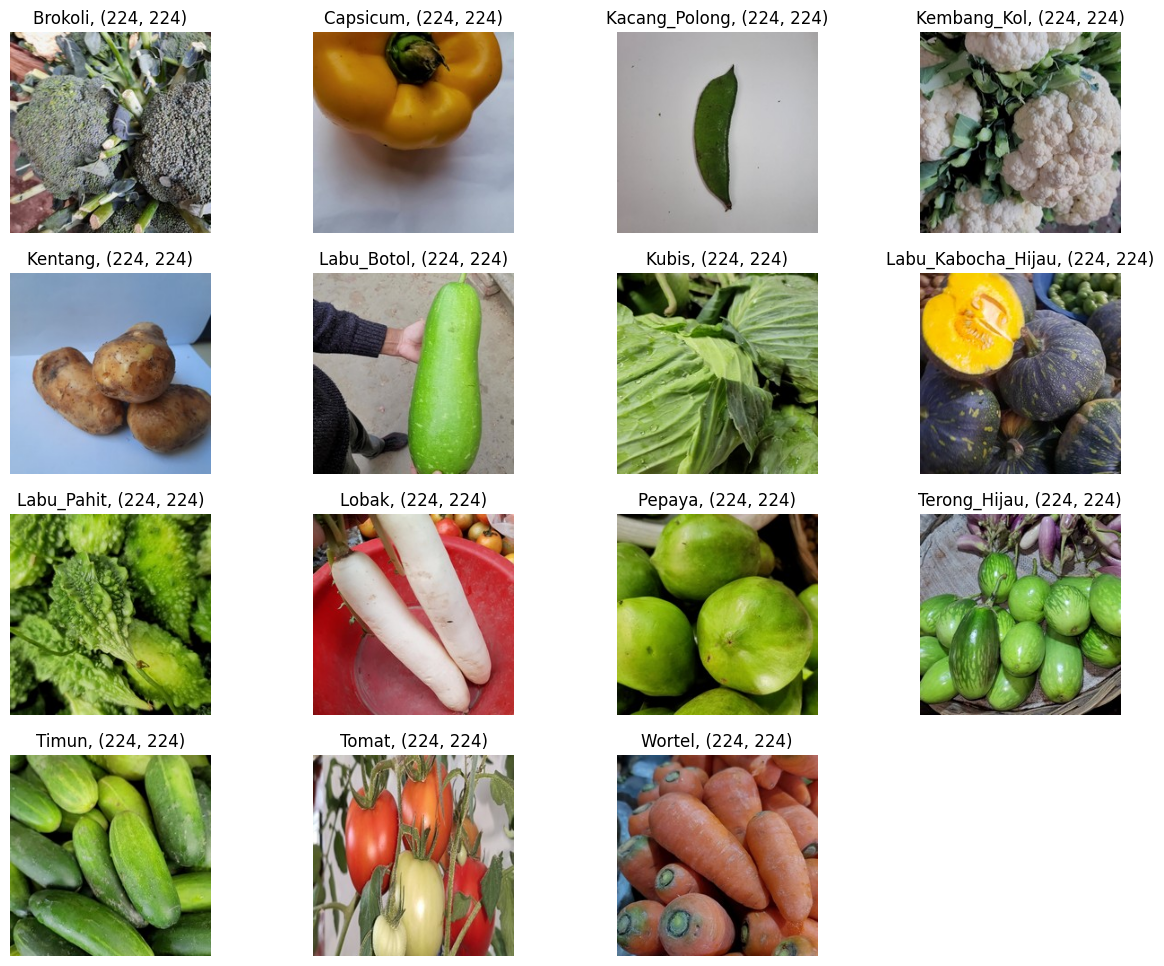

In [ ]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

**Data Preparation**

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/train", shuffle=True
)

print('\nLoading Validasi Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/validation", shuffle=False
)

print('\nLoading Testing Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/test", shuffle=False
)


Loading Train Data...
Found 15000 files belonging to 15 classes.

Loading Validasi Data...
Found 3022 files belonging to 15 classes.

Loading Testing Data...
Found 3000 files belonging to 15 classes.


In [ ]:
def create_data_preprocess_model(shear_range=0.2, zoom_range=0.2, horizontal_flip=True):
    data_preprocess = keras.Sequential(
        name="data_preprocess",
        layers=[
            layers.Rescaling(1.0 / 255),
        ]
    )

    return data_preprocess


train_data_gen = create_data_preprocess_model(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)



data_preprocess_val_test = keras.Sequential(
    name="data_preprocess_val_test",
    layers=[
        layers.Rescaling(1.0/255),
    ]
)


train_ds = train_data.map(lambda x, y: (train_data_gen(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess_val_test(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess_val_test(x), y))

**Modeling**

**Pemanfaatan MobileNet sebagai Model Klasifikasi**

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [ ]:
pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

/tmp/ipython-input-2280674694.py:1: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Compile Model**

In [ ]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
mobilenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, None, None,     │     2,257,984 │
│ (Functional)                    │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Training pada Model yang Dibangun**

In [ ]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9119 - loss: 0.3506

469/469 ━━━━━━━━━━━━━━━━━━━━ 1812s 4s/step - accuracy: 0.9120 - loss: 0.3501 - val_accuracy: 0.9974 - val_loss: 0.0152
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9968 - loss: 0.0138

469/469 ━━━━━━━━━━━━━━━━━━━━ 1158s 2s/step - accuracy: 0.9968 - loss: 0.0138 - val_accuracy: 0.9974 - val_loss: 0.0118
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9996 - loss: 0.0029

469/469 ━━━━━━━━━━━━━━━━━━━━ 1164s 2s/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9980 - val_loss: 0.0073
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1136s 2s/step - accuracy: 1.0000 - loss: 9.4036e-04 - val_accuracy: 0.9980 - val_loss: 0.0080
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1121s 2s/step - accuracy: 1.0000 - loss: 4.9432e-04 - val_accuracy: 0.9980 - val_loss: 0.0082
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1131s 2s/step - accuracy: 1.0000 - loss: 3.3044e-04 - val_accuracy: 0.9980 - val_loss: 0.0079
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1141s 2s/step - accuracy: 1.0000 - loss: 2.3618e-04 - val_accuracy: 0.9980 - val_loss: 0.0080
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1177s 2s/step - accuracy: 1.0000 - loss: 1.6910e-04 - val_accuracy: 0.9980 - val_loss: 0.0081


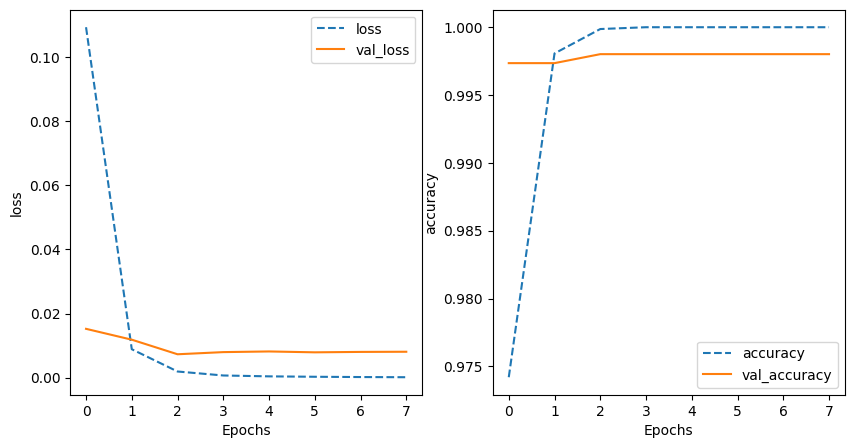

In [ ]:
training_plot(['loss', 'accuracy'], history_mobilenet)

In [ ]:
testAccuracy(mobilenet_model)

94/94 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step

Test Accuracy: 99.90%



94/94 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step


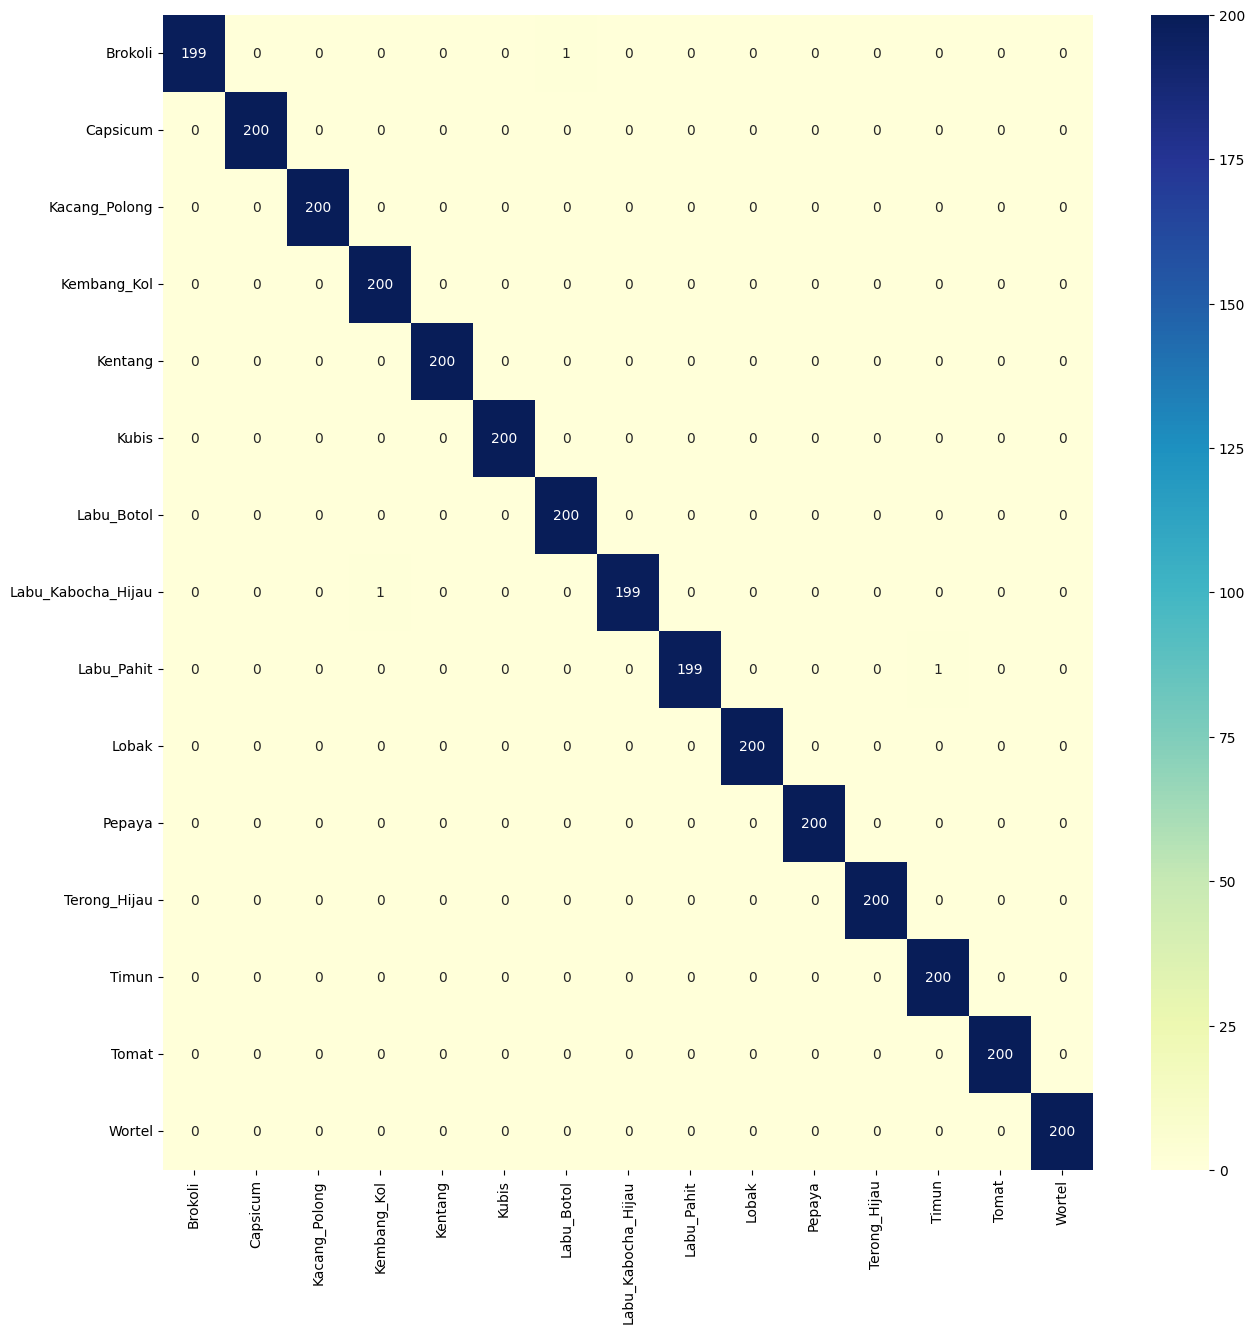

In [ ]:
ConfusionMatrix(mobilenet_model, test_ds, test_data.class_names)

**Evaluasi Model**

In [ ]:
test_loss, test_acc = mobilenet_model.evaluate(val_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

95/95 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9986 - loss: 0.0052
Test Loss: 0.00730495760217309
Test Accuracy: 0.9980145692825317


In [ ]:
mobilenet_model.evaluate(test_ds)

94/94 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9982 - loss: 0.0040


[0.003236964577808976, 0.9990000128746033]

94/94 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step


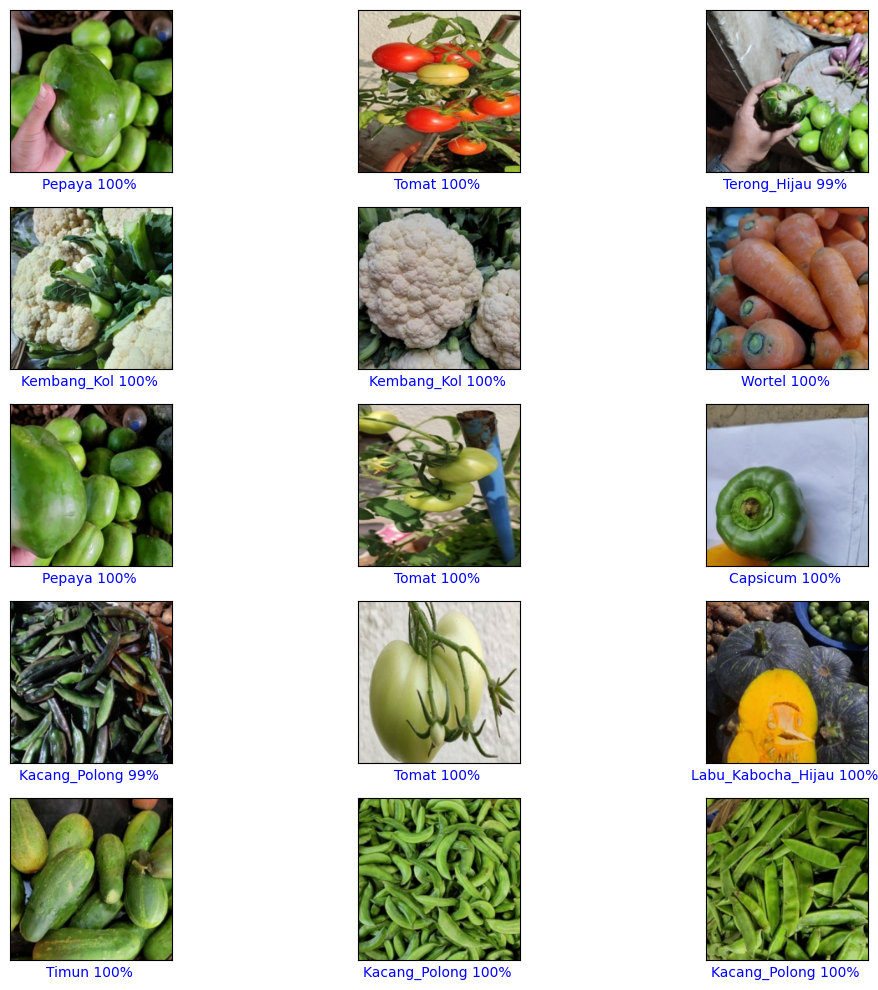

In [ ]:
predictions(mobilenet_model)

**Pengujian Model Menggunakan Dataset Test**

In [ ]:
import glob, os

folders = glob.glob("/content/drive/MyDrive/Datasets/test/*")

for folder in folders:
    class_name = os.path.basename(folder)
    print(f"\n=== {class_name} ===")

    files = glob.glob(f"{folder}/*")
    for f in files[:10]:
        print(f"- {os.path.basename(f)}")



=== Brokoli ===
- 1031.jpg
- 1013.jpg
- 1005.jpg
- 1064.jpg
- 1067.jpg
- 1048.jpg
- 1042.jpg
- 1047.jpg
- 1025.jpg
- 1056.jpg

=== Capsicum ===
- 1006.jpg
- 1005.jpg
- 1003.jpg
- 1002.jpg
- 1001.jpg
- 1007.jpg
- 1004.jpg
- 1034.jpg
- 1117.jpg
- 1086.jpg

=== Kacang_Polong ===
- 0137.jpg
- 0114.jpg
- 0109.jpg
- 0126.jpg
- 0138.jpg
- 0103.jpg
- 0100.jpg
- 0142.jpg
- 0131.jpg
- 0119.jpg

=== Kembang_Kol ===
- 1112.jpg
- 1144.jpg
- 1130.jpg
- 1104.jpg
- 1155.jpg
- 1095.jpg
- 1049.jpg
- 1114.jpg
- 1059.jpg
- 1106.jpg

=== Kentang ===
- 1021.jpg
- 1038.jpg
- 1046.jpg
- 1049.jpg
- 1042.jpg
- 1019.jpg
- 1008.jpg
- 1002.jpg
- 1030.jpg
- 1039.jpg

=== Kubis ===
- 1046.jpg
- 1032.jpg
- 1056.jpg
- 1089.jpg
- 1034.jpg
- 1029.jpg
- 1079.jpg
- 1090.jpg
- 1015.jpg
- 1088.jpg

=== Labu_Botol ===
- 1001.jpg
- 1028.jpg
- 1011.jpg
- 1021.jpg
- 1009.jpg
- 1023.jpg
- 1019.jpg
- 1002.jpg
- 1018.jpg
- 1017.jpg

=== Labu_Kabocha_Hijau ===
- 1069.jpg
- 1059.jpg
- 1074.jpg
- 1073.jpg
- 1066.jpg
- 1031.jpg
- 102

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


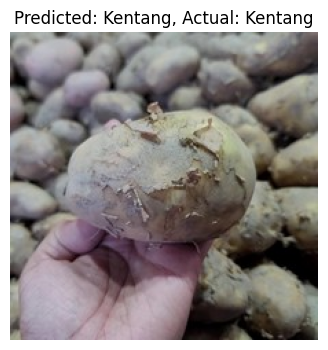

In [ ]:
from tensorflow.keras.preprocessing import image

test_image_path = '/content/drive/MyDrive/Datasets/test/Kentang/1002.jpg'

def generate_predictions(test_image_path):
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img) / 255.0
    test_img_input = np.expand_dims(test_img_arr, axis=0)

    # 2. Make Predictions
    predicted_label = np.argmax(mobilenet_model.predict(test_img_input))
    predicted_vegetable = class_names[predicted_label]

    # 3. Ambil label aktual dari nama folder
    actual_label = os.path.basename(os.path.dirname(test_image_path))

    # 4. Tampilkan hasil
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr.astype("float32"))
    plt.title(f"Predicted: {predicted_vegetable}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path)


In [ ]:
from google.colab import files
files.download("final_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

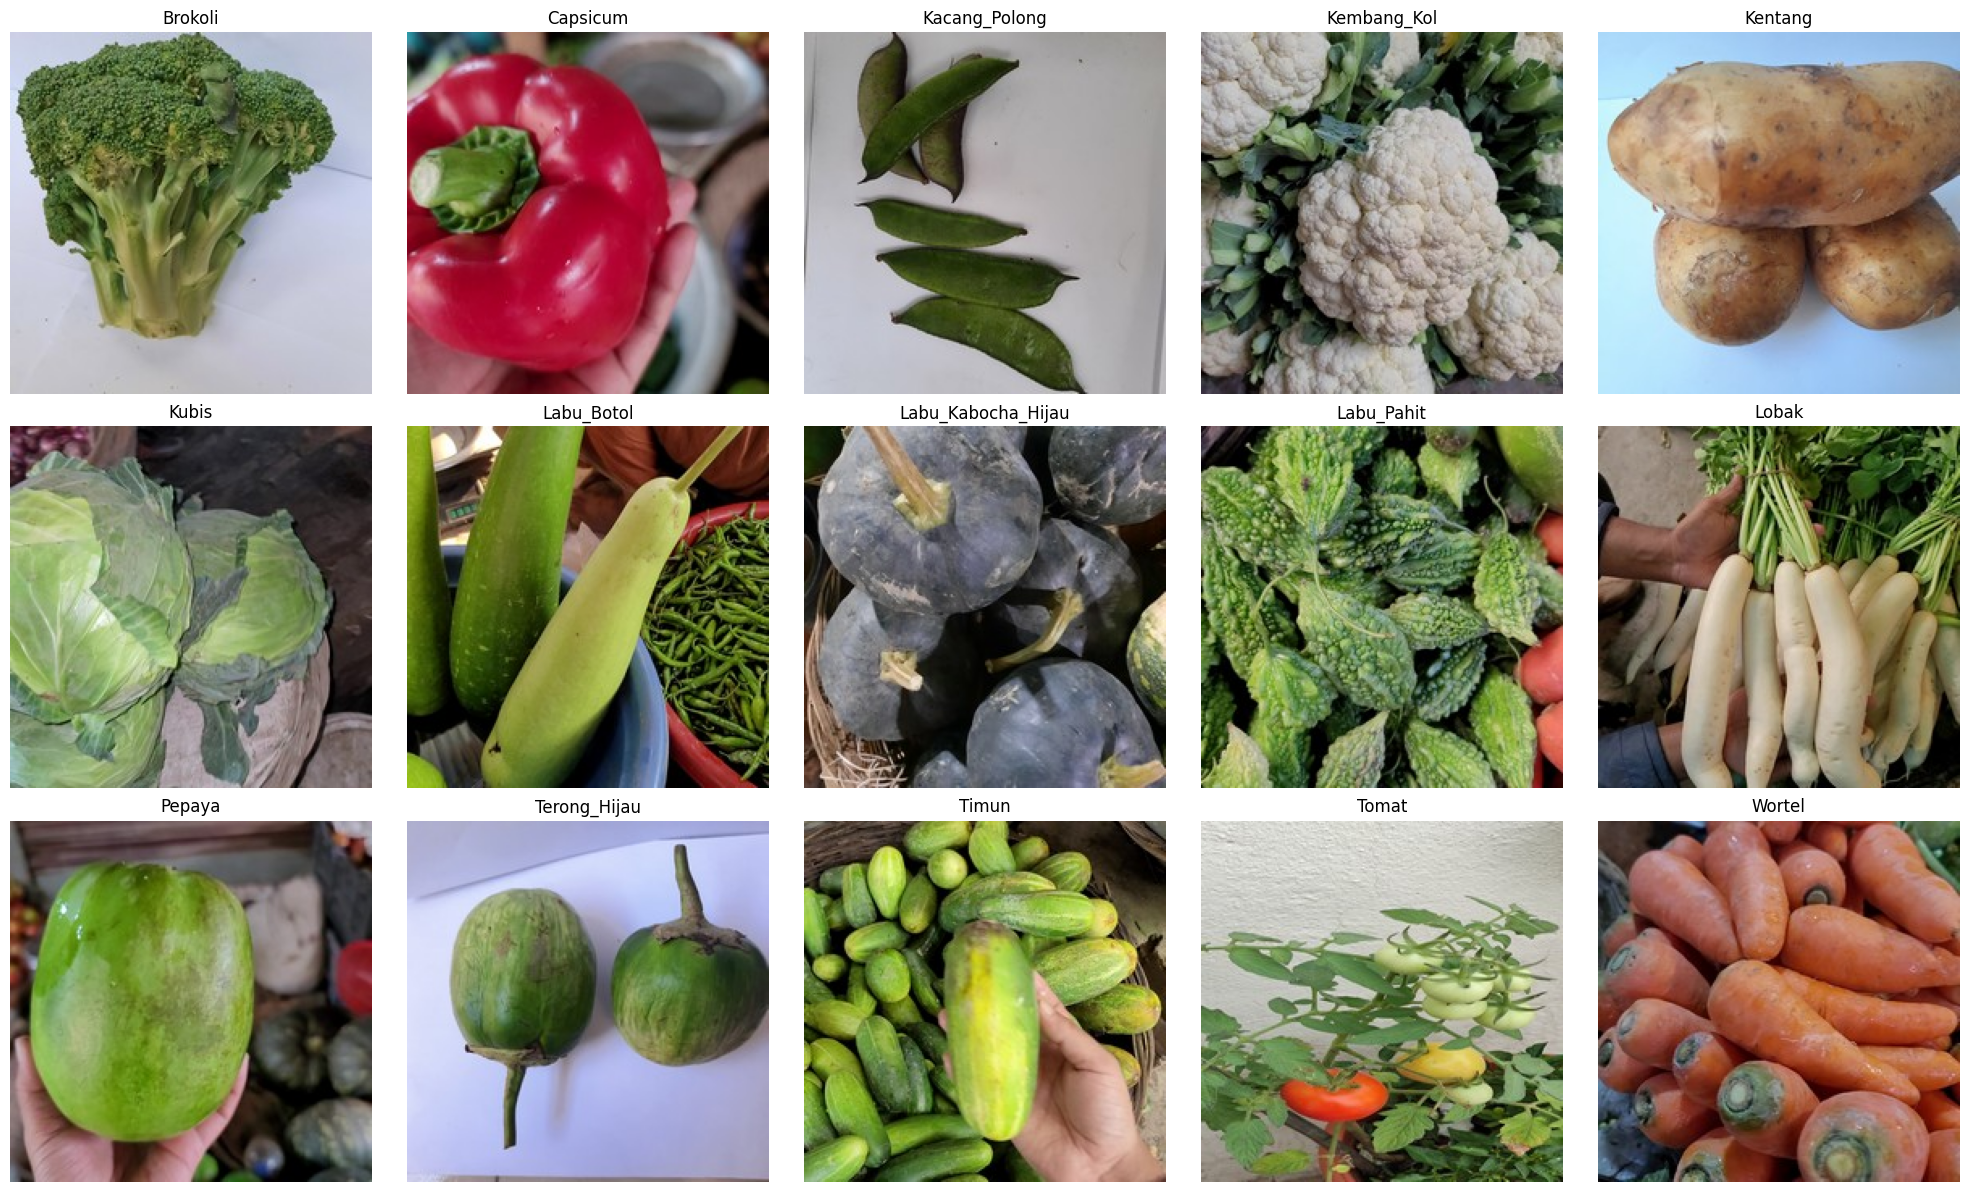

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, glob, random

# Path dataset test
dataset_path = "/content/drive/MyDrive/Datasets/test/"

# Ambil semua folder kelas
class_folders = sorted(os.listdir(dataset_path))

# Siapkan grid (misal 3 baris x 5 kolom untuk 15 kelas)
plt.figure(figsize=(20, 12))

for idx, class_name in enumerate(class_folders[:15]):  # ambil max 15 kelas
    class_folder = os.path.join(dataset_path, class_name)
    img_files = glob.glob(os.path.join(class_folder, "*.jpg"))

    if len(img_files) > 0:
        img = mpimg.imread(random.choice(img_files))  # ambil random biar bervariasi
        plt.subplot(3, 5, idx+1)
        plt.imshow(img)
        plt.title(class_name, fontsize=12)
        plt.axis("off")

plt.tight_layout()

# Simpan ke folder assets
os.makedirs("assets", exist_ok=True)
plt.savefig("assets/output.png")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# load model lama
old_model = load_model("final_model.h5")

old_model.save("final_model.keras")        # format Keras modern (recommended)


old_model.export("final_model_savedmodel") # format folder SavedModel


Saved artifact at 'final_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139534186943440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213704272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213694480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534429231568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213695632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213704080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139536238900432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213696592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534187853200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139534213703888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1395